# Árvores de decisão e florestas aleatórias em Python

Este é o código para o vídeo da conferência que aborda sobre os métodos de árvores de decisões em Python. Consulte o vídeo para uma explicação completa.

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtendo os dados

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

Vamos observar um simples pairplot para este pequeno conjunto de dados.

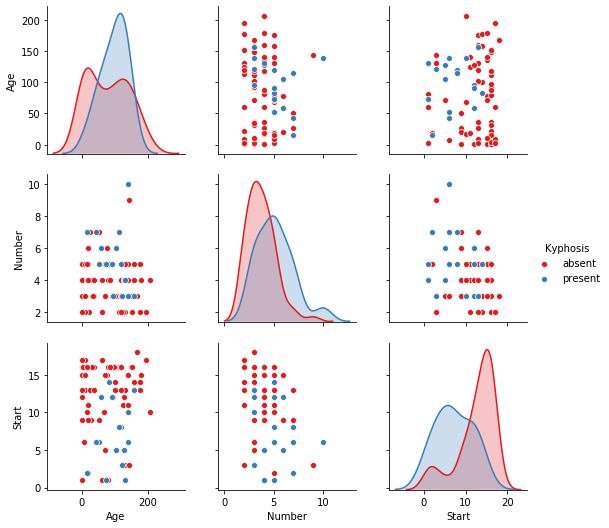

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Divisão treino-teste

Vamos dividir os dados em um conjunto de treinamento e um conjunto de testes!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Árvores de decisão

Começaremos apenas treinando uma única árvore de decisão.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Seleção de variáveis

Null Hypothesis (H0): Two variables are independent.
Alternate Hypothesis (H1): Two variables are not independent.

In [43]:
from sklearn import tree, pipeline, preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score

cart_model = tree.DecisionTreeClassifier()

pipe = pipeline.Pipeline(steps=[
    ("feature_selection", SelectKBest(chi2, k="all")),
    ("CART", cart_model)])


In [44]:
pipe.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function chi2 at 0x1a223fae18>)),
                ('CART',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

In [46]:
# return value is array of scores
scores = cross_val_score(pipe, X_train, y_train, cv=5)

# use as quality metric the average CV score
meanCvAccuracy = scores.mean()

print("Mean CV accuracy= %f" % meanCvAccuracy)


Mean CV accuracy= 0.804242


In [47]:
# return value is array of scores
scores = cross_val_score(dtree, X_train, y_train, cv=5)

# use as quality metric the average CV score
meanCvAccuracy = scores.mean()

print("Mean CV accuracy= %f" % meanCvAccuracy)

Mean CV accuracy= 0.822424


## Previsão e Avaliação

Vamos avaliar a nossa árvore de decisão.

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.94      0.77      0.85        22
     present       0.29      0.67      0.40         3

    accuracy                           0.76        25
   macro avg       0.62      0.72      0.62        25
weighted avg       0.87      0.76      0.80        25



In [14]:
print(confusion_matrix(y_test,predictions))

[[17  5]
 [ 1  2]]


## Visualização de árvore

O Scikit learn possui alguns recursos de visualização incorporados para árvores de decisão. Você não usará isso com freqüência e requer que você instale a biblioteca pydot, mas aqui está um exemplo do código para executar isso:

In [53]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [88]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['absent','present'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


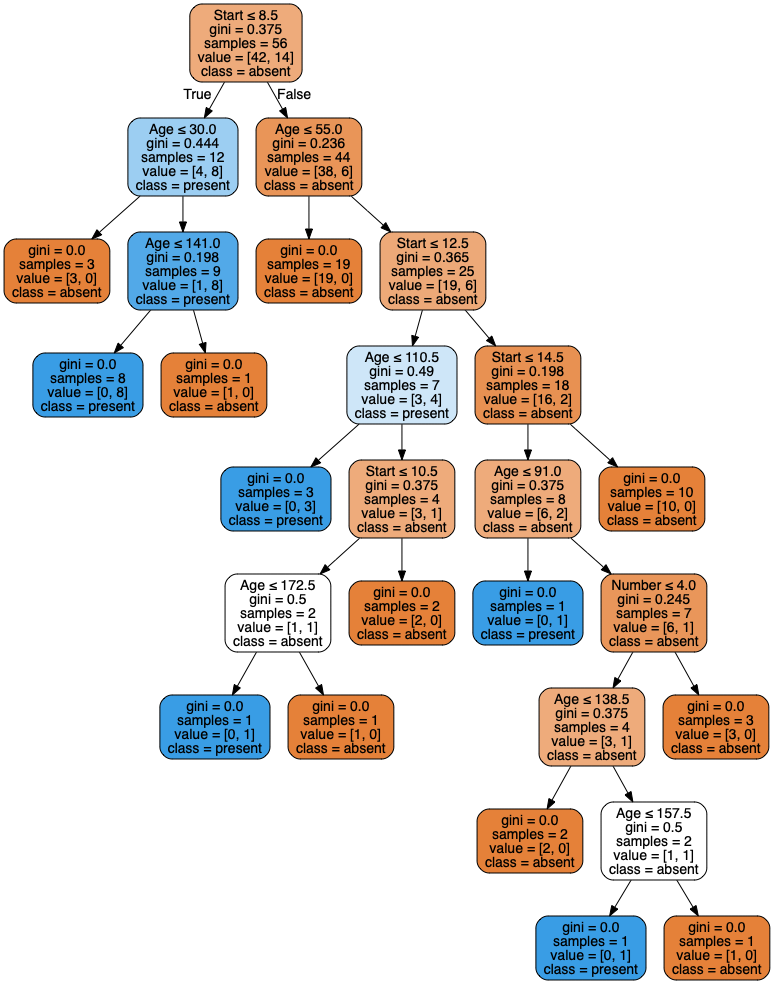

In [89]:
graph.write_png('tree.png')
Image(graph.create_png())

## Florestas aleatórias

Agora vamos comparar o modelo da árvore de decisão com uma floresta aleatória.

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
rfc_pred = rfc.predict(X_test)

In [58]:
print(confusion_matrix(y_test,rfc_pred))

[[17  5]
 [ 1  2]]


In [59]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.94      0.77      0.85        22
     present       0.29      0.67      0.40         3

    accuracy                           0.76        25
   macro avg       0.62      0.72      0.62        25
weighted avg       0.87      0.76      0.80        25



In [83]:
# Extract single tree
estimator = rfc.estimators_[99]

In [86]:
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['absent','present'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


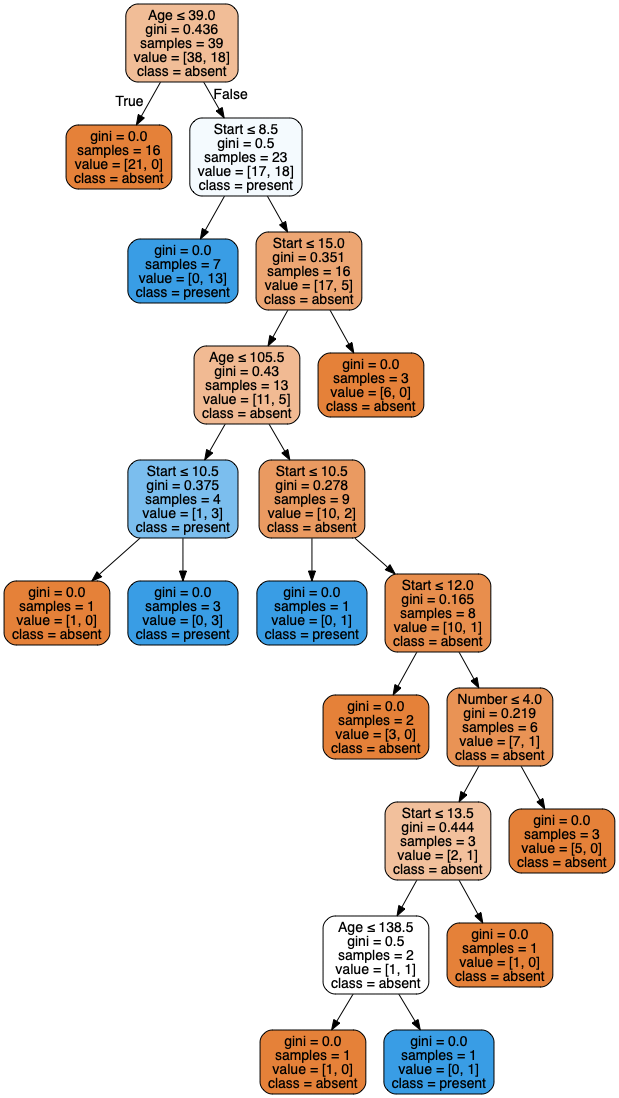

In [87]:
graph.write_png('rf.png')
Image(graph.create_png())